In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
# Definimos el rango de los datos
start = '2021-12-30'
end = '2024-02-29'

In [4]:
# Definimos los tickers de los assets

assets = ['TTWO', 'BABA', 'PYPL', 'INTC', 'META', 'MSFT', 'BRK-B', 'AMZN', 'NVDA', 'AMD', 'VOO', 'NU']
assets.sort()

In [5]:
print(assets)

['AMD', 'AMZN', 'BABA', 'BRK-B', 'INTC', 'META', 'MSFT', 'NU', 'NVDA', 'PYPL', 'TTWO', 'VOO']


In [6]:
# Descargamos los datos
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  12 of 12 completed


In [7]:
print(data)

                   AMD        AMZN        BABA       BRK-B       INTC  \
Date                                                                    
2021-12-30  145.149994  168.644501  121.358612  299.980011  48.487671   
2021-12-31  143.899994  166.716995  117.214325  299.000000  48.262756   
2022-01-03  150.240005  170.404495  118.783234  300.790009  49.865265   
2022-01-04  144.419998  167.522003  117.974113  308.529999  49.799664   
2022-01-05  136.149994  164.356995  119.552895  309.920013  50.483784   
...                ...         ...         ...         ...        ...   
2024-02-22  181.860001  174.580002   76.120003  415.160004  42.980000   
2024-02-23  176.520004  174.990005   75.959999  417.220001  42.990002   
2024-02-26  176.009995  174.729996   76.510002  409.140015  42.990002   
2024-02-27  178.000000  173.539993   77.680000  408.910004  42.730000   
2024-02-28  176.539993  173.160004   74.589996  412.140015  41.990002   

                  META        MSFT     NU        N

In [8]:
# Calculando los retornos

Y = data.resample('M').last().pct_change().dropna()

display(Y.head())

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
Date,,,,,,,,,,,,
2022-01-31,-0.206046,-0.102830,0.058928,0.046890,-0.052039,-0.068649,-0.075345,-0.208955,-0.167454,-0.088238,-0.080914,-0.052409
2022-02-28,0.079562,0.026673,-0.163765,0.026931,-0.015498,-0.326342,-0.037212,0.030997,-0.004125,-0.349017,-0.008204,-0.029805
2022-03-31,-0.113507,0.061437,0.034319,0.097869,0.038994,0.053689,0.031862,0.009150,0.119157,0.033235,-0.050988,0.037892
2022-04-30,-0.217853,-0.237525,-0.107629,-0.085234,-0.120460,-0.098444,-0.099867,-0.221503,-0.320274,-0.239689,-0.222649,-0.087843
2022-05-31,0.191066,-0.032764,-0.010712,-0.021219,0.027096,-0.034070,-0.018077,-0.366057,0.006740,-0.030934,0.042005,0.002588


In [9]:
!pip install riskfolio-lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 8.0 MB/s eta 0:00:00


In [10]:
import riskfolio as rp

In [11]:
# Construyendo el objeto portafolio
port = rp.Portfolio(returns=Y)

In [12]:
# Calculando el portafolio optimo

# Definiendo los parametros de seleccion del metodo de optimizacion:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

In [13]:
# Estimando el portafolio optimo:

port.alpha = 0.05
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
weights,7.891391e-10,7.468004e-10,1.111896e-09,0.497521,7.658028e-10,0.027761,2.463244e-09,5.203570e-09,0.474718,2.821511e-10,7.731282e-10,1.512091e-09


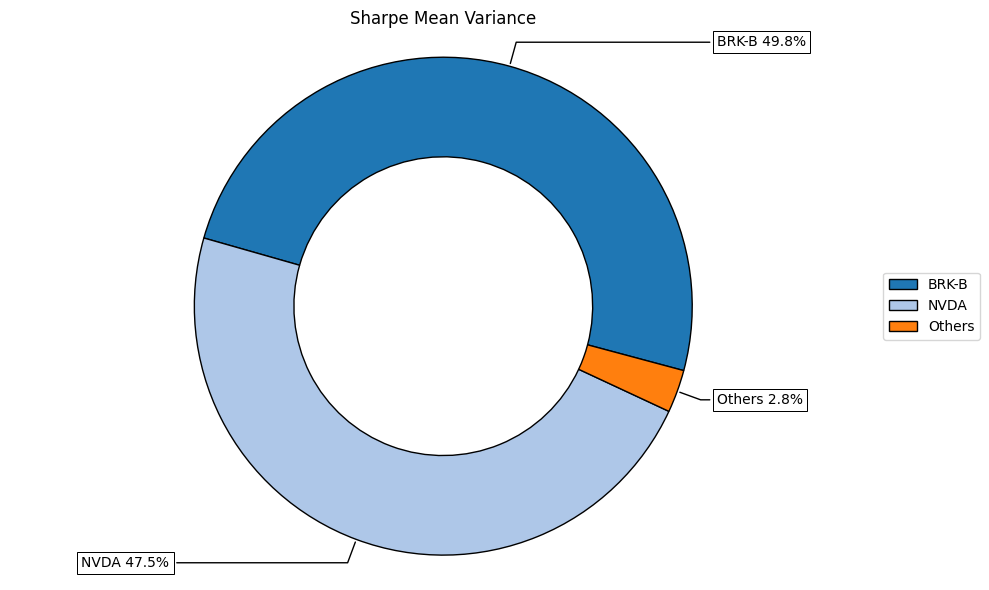

In [14]:
# Graficando la composicion del portafolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


## Siguiendo la Optimización por Maximización del Sharpe Ratio, nuestro portafolio óptimo sería el invertir el 49.8% de nuestra cartera en la enmpresa Berkshire Hathaway, el 47.5 % en NVIDIA y el restante (2.8%) en los otros activos de nuestra cartera.


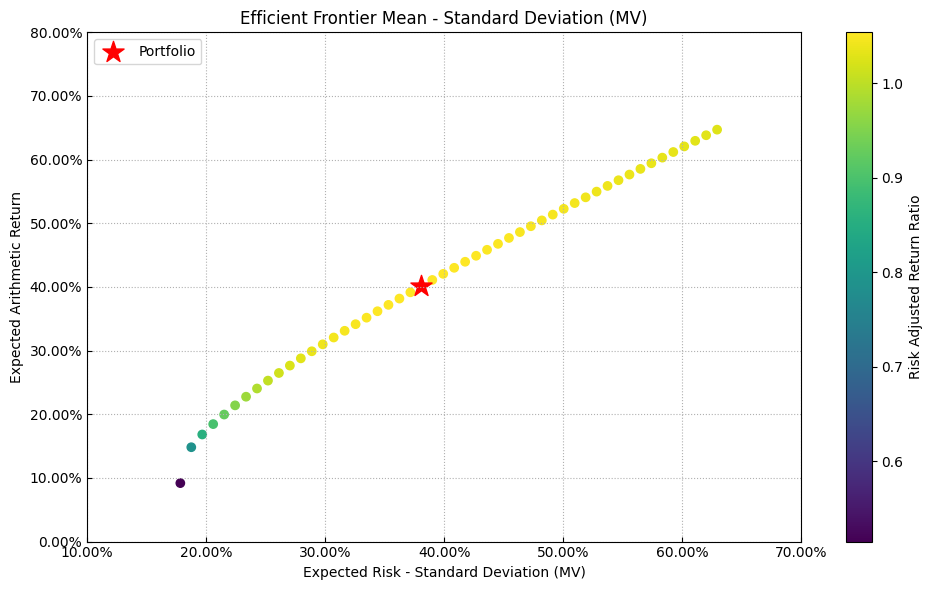

In [15]:
# Graficando la frontera eficiente
frontier=port.efficient_frontier(model=model,rm=rm,points=50,rf=rf,hist=hist)
ax=rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=Y,rm=rm,rf=rf,cmap='viridis',w=w,t_factor=12)
plt.show()

## Según nuestra Frontera Eficiente, debemos de obtener un 40% de rentabilidad y, en ese sentido, un escenario de riesgo de volatilidad de 37% aproximadamente.

In [16]:
display(frontier.T.head())

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
0,1.161495e-11,2.381856e-11,0.125402,0.497798,2.711755e-11,2.534420e-11,0.042743,0.023986,7.318956e-12,2.159858e-11,1.346396e-01,1.754327e-01
1,1.139214e-08,9.539791e-09,0.080038,0.686078,1.013795e-08,8.426030e-03,0.163366,0.062092,1.881334e-08,2.785835e-09,5.114873e-08,5.130881e-08
2,4.499424e-09,3.131270e-09,0.043048,0.737006,3.572612e-09,6.109106e-02,0.095611,0.063243,7.971697e-09,8.456637e-10,9.120951e-09,1.296609e-08
3,1.766641e-09,9.698401e-10,0.014104,0.777139,1.182321e-09,1.020459e-01,0.041458,0.063860,1.392875e-03,2.350413e-10,1.944820e-09,3.064874e-09
4,1.276123e-08,8.640268e-09,0.004510,0.793738,1.068758e-08,1.118974e-01,0.007757,0.059990,2.210774e-02,2.226443e-09,1.303380e-08,2.254444e-08


In [17]:
frontier*100

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AMD,1.161495e-09,1.139214e-06,4.499424e-07,1.766641e-07,1.276123e-06,5.408587e-07,2.941674e-07,3.326766e-07,2.340938e-07,4.119303e-07,...,2.436661e-07,3.803607e-07,3.587997e-07,3.852885e-07,3.670999e-07,1.007466e-06,1.141008e-08,7.868268e-08,1.717743e-07,2.122195e-09
AMZN,2.381856e-09,9.539791e-07,3.131270e-07,9.698401e-08,8.640268e-07,4.180281e-07,2.547484e-07,3.118645e-07,1.859661e-07,3.411034e-07,...,2.375438e-07,3.772993e-07,3.599440e-07,3.865967e-07,3.662032e-07,1.047836e-06,1.350481e-08,8.246723e-08,2.431542e-07,7.690562e-10
BABA,1.254016e+01,8.003789e+00,4.304848e+00,1.410358e+00,4.509966e-01,7.016420e-06,5.984628e-07,3.871811e-07,4.836716e-07,7.692952e-07,...,2.789885e-07,4.449031e-07,4.243414e-07,4.527644e-07,4.253841e-07,1.263736e-06,1.760319e-08,1.007786e-07,3.914469e-07,5.116974e-10
BRK-B,4.977979e+01,6.860777e+01,7.370064e+01,7.771389e+01,7.937385e+01,7.851401e+01,7.671823e+01,7.501241e+01,7.336866e+01,7.178529e+01,...,1.668861e+01,1.481744e+01,1.295105e+01,1.108916e+01,9.231536e+00,7.377929e+00,5.528198e+00,3.682069e+00,1.839385e+00,9.870500e-10
INTC,2.711755e-09,1.013795e-06,3.572612e-07,1.182321e-07,1.068758e-06,5.348170e-07,2.862554e-07,3.231735e-07,2.061460e-07,3.720267e-07,...,2.550469e-07,4.074025e-07,3.900734e-07,4.188958e-07,3.959264e-07,1.152360e-06,1.568974e-08,9.222337e-08,3.183138e-07,2.232674e-10
META,2.534420e-09,8.426030e-01,6.109106e+00,1.020459e+01,1.118974e+01,1.115787e+01,1.060096e+01,1.007178e+01,9.564429e+00,9.073838e+00,...,2.643026e-06,3.847933e-06,3.393171e-06,3.500259e-06,3.267493e-06,8.440602e-06,9.136895e-08,7.334249e-07,2.584540e-06,8.799764e-09
MSFT,4.274266e+00,1.633663e+01,9.561064e+00,4.145844e+00,7.756835e-01,6.643781e-06,1.026473e-06,8.335140e-07,1.124409e-06,1.810589e-06,...,6.423416e-07,1.006021e-06,9.523715e-07,1.021234e-06,9.685559e-07,2.811107e-06,3.947635e-08,2.485664e-07,1.189712e-06,7.193003e-10
NU,2.398560e+00,6.209196e+00,6.324340e+00,6.386024e+00,5.998954e+00,5.312082e+00,4.561771e+00,3.846531e+00,3.166909e+00,2.504193e+00,...,8.512537e-07,1.330938e-06,1.254116e-06,1.333958e-06,1.257053e-06,3.710900e-06,5.106247e-08,3.156351e-07,1.423421e-06,4.217625e-10
NVDA,7.318956e-10,1.881334e-06,7.971697e-07,1.392875e-01,2.210774e+00,5.016022e+00,8.119040e+00,1.106928e+01,1.390000e+01,1.663667e+01,...,8.331138e+01,8.518255e+01,8.704894e+01,8.891083e+01,9.076846e+01,9.262205e+01,9.447180e+01,9.631793e+01,9.816061e+01,1.000000e+02
PYPL,2.159858e-09,2.785835e-07,8.456637e-08,2.350413e-08,2.226443e-07,1.126465e-07,7.185260e-08,9.163555e-08,5.117877e-08,9.571421e-08,...,8.108784e-08,1.277564e-07,1.213405e-07,1.306974e-07,1.244963e-07,3.461566e-07,4.113522e-09,2.726182e-08,7.182454e-08,8.562098e-10


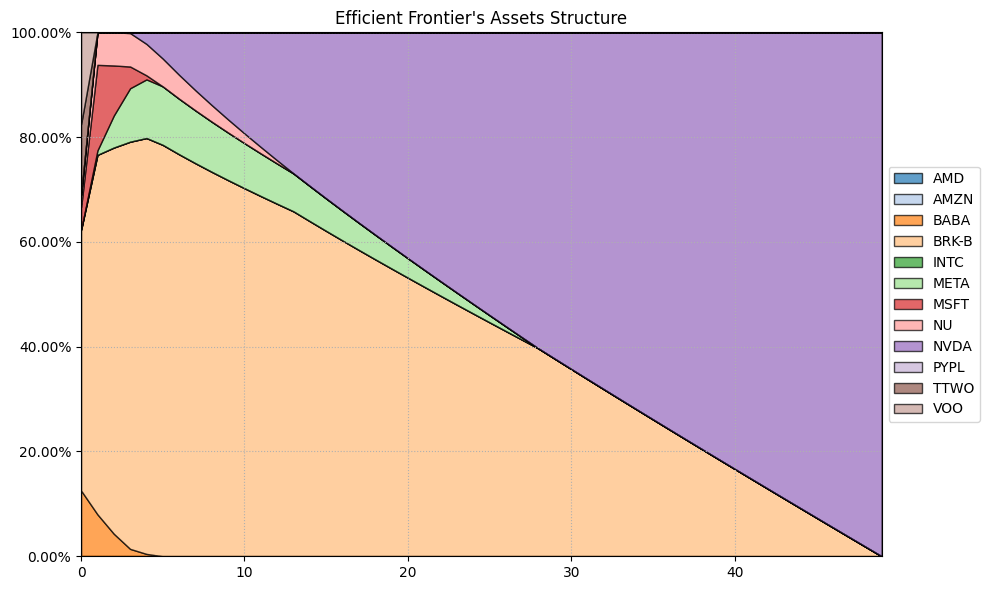

In [18]:
ax=rp.plot_frontier_area(w_frontier=frontier,cmap='tab20')
plt.show()

Según este gráfico, ta

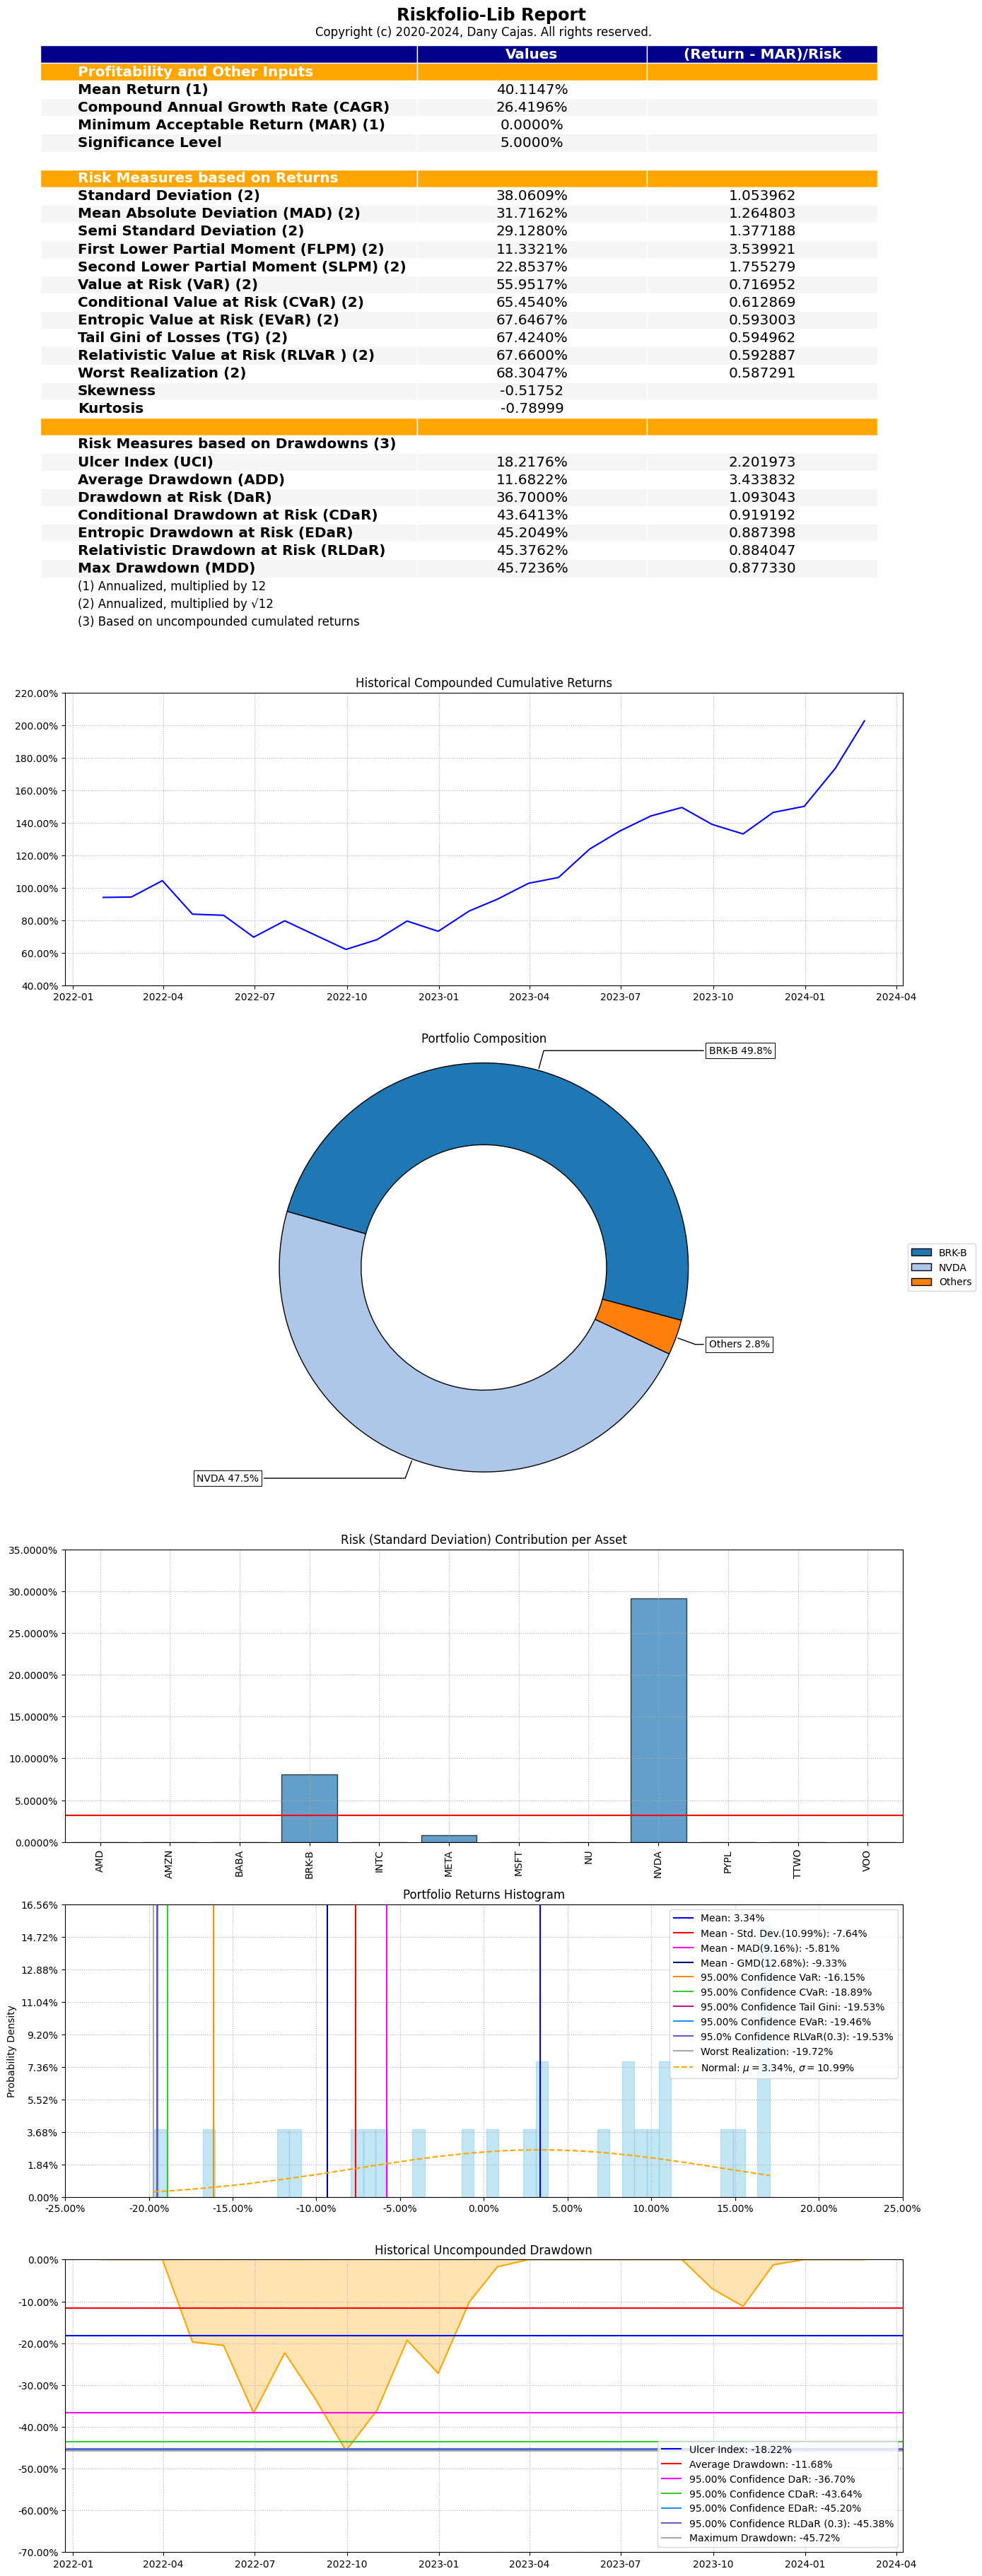

In [19]:
ax=rp.jupyter_report(Y,w,rm=rm,t_factor=12)
plt.show()